<a href="https://colab.research.google.com/github/s07362022/CNN_to_train/blob/master/yolo0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 先在自己的google drive上上傳自己所拍攝的影像
# 建立 face_dataset 資料夾
# 進入 face_dataset 後建立 face_img與face_lab資料夾
# 再建立obj 資料夾 儲存obj.data,obj.names,train.txt,test.txt使用

#obj.names 的內容:
names (自己的名子用英文)


# obj.data 的內容
classes =1

valid = /content/cfg_mask/test.txt

names =  /content/cfg_mask/obj.names
 
backup = ./face

train = /content/cfg_mask/train.txt

# 開啟鏡頭拍攝並且下載影像程式碼:
https://github.com/s07362022/opencv/blob/master/dimg.py

# 開啟Labelimg
步驟一 打開cmd

---


步驟二 輸入 pip install labelimg

---


步驟三 labelimg

In [ ]:
! nvidia-smi

Tue Jan 26 01:11:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
! git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.26 MiB | 23.78 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [2]:
! cd darknet; head Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [74]:
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile
! sed -i "s/ZED_CAMERA=0/ZED_CAMERA=1/g" /content/darknet/Makefile

In [75]:
! head /content/darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=1
ZED_CAMERA_v2_8=0



In [76]:
! cd darknet; make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DZED_STEREO -I/usr/local/zed/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/

In [6]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


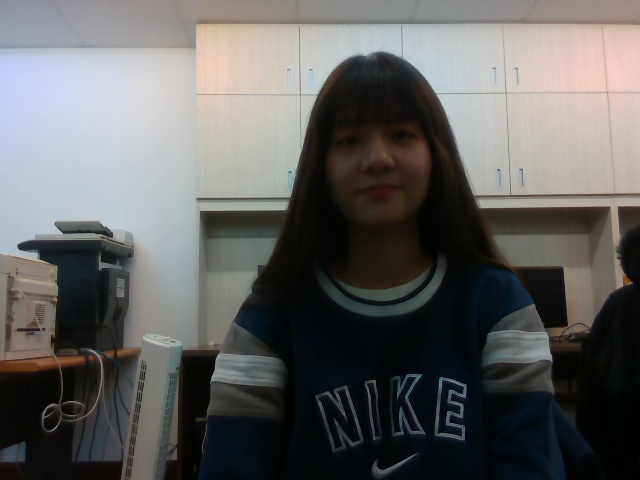

In [7]:
from PIL import Image 
Image.open('/content/drive/MyDrive/face_dataset/face_img/771.jpg')

In [8]:
! cat "/content/drive/MyDrive/face_dataset/face_lab/771.xml"

<annotation>
	<folder>jw_img</folder>
	<filename>771.jpg</filename>
	<path>F:\face_ML\jw_img\771.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>640</width>
		<height>480</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>jw</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>279</xmin>
			<ymin>47</ymin>
			<xmax>466</xmax>
			<ymax>252</ymax>
		</bndbox>
	</object>
</annotation>


In [9]:
! mkdir /content/yolo1

In [10]:
from bs4 import BeautifulSoup
import os
import shutil

status_dic = {'jw': 0, 'li': 1} #修改類別(名稱)
def getYoloFormat(filename,label_path, img_path, yolo_path, newname):
    with open(label_path+ filename, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')
        imgname = soup.select_one('filename').text
        image_w = int(soup.select_one('width').text)
        image_h = int(soup.select_one('height').text)
        ary = []
        for obj in soup.select('object'):
            xmin = int(obj.select_one('xmin').text)
            xmax = int(obj.select_one('xmax').text)
            ymin = int(obj.select_one('ymin').text)
            ymax = int(obj.select_one('ymax').text)
            objclass = status_dic.get(obj.select_one('name').text)

            x = (xmin + (xmax-xmin)/2) * 1.0 / image_w
            y = (ymin + (ymax-ymin)/2) * 1.0 / image_h
            w = (xmax-xmin) * 1.0 / image_w
            h = (ymax-ymin) * 1.0 / image_h
            ary.append(' '.join([str(objclass), str(x),str(y),str(w),str(h)]))
        if os.path.exists(img_path + imgname):
            shutil.copyfile(img_path + imgname, yolo_path + newname + '.jpg')
            with open(yolo_path + newname + '.txt', 'w') as f:
                f.write('\n'.join(ary))

In [11]:
import os
labelpath = '/content/drive/MyDrive/face_dataset/face_lab/'
imgpath   = '/content/drive/MyDrive/face_dataset/face_img/'
yolopath  = '/content/yolo1/'
ary = []
for idx, f in enumerate(os.listdir(labelpath)):
    try:
        getYoloFormat(f, labelpath,imgpath, yolopath, str(idx))
    except Exception as e:
        print(e)

In [12]:
! cat /content/yolo1/123.txt

1 0.49921875 0.3333333333333333 0.1953125 0.32083333333333336

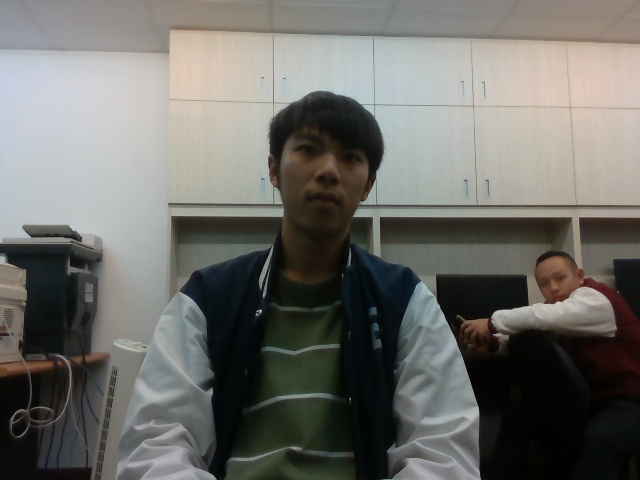

In [13]:
Image.open('/content/yolo1/123.jpg')

In [14]:
! mkdir /content/cfg_mask

In [15]:
import os
datasets = ['/content/yolo1/'+ f for f in os.listdir('/content/yolo1/') if not f.endswith('.txt')]
len(datasets) * 0.8

155.20000000000002

In [16]:
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:155]))

In [17]:
with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[155:]))

In [18]:
! cp "/content/drive/MyDrive/face_dataset/weights/obj.data" cfg_mask/
! cp "/content/drive/MyDrive/face_dataset/weights/obj.names" cfg_mask/

In [19]:
!mkdir face

In [21]:
! head /content/cfg_mask/obj.data

classes =2

valid = /content/cfg_mask/test.txt

names =  /content/cfg_mask/obj.names
 
backup = ./face

train = /content/cfg_mask/train.txt

In [22]:
! head /content/cfg_mask/obj.names

jw
li

In [23]:
! mkdir /content/cfg_mask/weights

In [24]:
! cp /content/darknet/cfg/yolov4-tiny.cfg /content/cfg_mask/

In [29]:
! sed -n -e 221p -e 229p -e 274p -e 280p /content/cfg_mask/yolov4-tiny.cfg

filters=255
classes=80
filters=255
classes=80


In [30]:

! sed -i '221s/255/18/' /content/cfg_mask/yolov4-tiny.cfg
! sed -i '229s/80/1/' /content/cfg_mask/yolov4-tiny.cfg
! sed -i '274s/255/18/' /content/cfg_mask/yolov4-tiny.cfg
! sed -i '280s/80/1/' /content/cfg_mask/yolov4-tiny.cfg

In [31]:
! sed -i '6s/64/4/' /content/cfg_mask/yolov4-tiny.cfg
! sed -i '7s/1/2/' /content/cfg_mask/yolov4-tiny.cfg
! sed -i '21s/2000200/3000/' /content/cfg_mask/yolov4-tiny.cfg

sed: can't read /content/cfg_mask/yolov3-tiny.cfg: No such file or directory
sed: can't read /content/cfg_mask/yolov3-tiny.cfg: No such file or directory
sed: can't read /content/cfg_mask/yolov3-tiny.cfg: No such file or directory


In [32]:
! sed -n -e 221p -e 229p -e 274p -e 280p /content/cfg_mask/yolov4-tiny.cfg

filters=21
classes=2
filters=21
classes=2


# 複製權重 
# 利用darknet53 訓練出來的53層訓練模型

In [33]:
! mkdir weight

In [35]:
! wget https://pjreddie.com/media/files/darknet53.conv.74
! cp "/content/darknet53.conv.74" /content/cfg_mask/

--2021-01-26 03:25:11--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  3.42MB/s    in 47s     

2021-01-26 03:25:59 (3.27 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!pwd

# 訓練模型

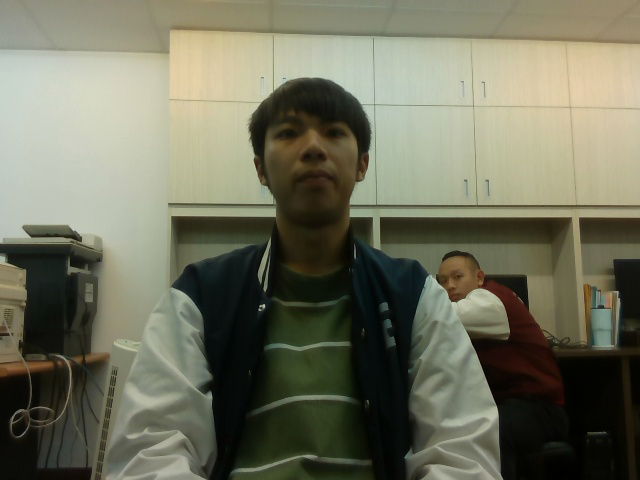

In [ ]:
Image.open('/content/yolo1/100.jpg')

In [41]:
import os

! darknet/darknet detector train /content/cfg_mask/obj.data /content/cfg_mask/yolov4-tiny.cfg /content/cfg_mask/darknet53.conv.74  -dont_show | grep "avg loss"

串流輸出內容已截斷至最後 5000 行。
 5087: 0.170668, 0.198911 avg loss, 0.002610 rate, 0.055071 seconds, 20348 images, 30.216808 hours left
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.774456), count: 2, class_loss = 0.066034, iou_loss = 0.273302, total_loss = 0.339335 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.731595), count: 1, class_loss = 0.006820, iou_loss = 0.273370, total_loss = 0.280190 
 total_bbox = 27736, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.723997), count: 2, class_loss = 0.581882, iou_loss = 0.143741, total_loss = 0.725623 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 27738, rewritten_bbox = 0.000000 % 
 5088: 0.170421, 0.196062 avg loss, 0.002610 rate, 0.051478 seconds, 20352 images, 30.220014 hours left

In [37]:
! cp "/content/cfg_mask/weights/yolov4-tiny_final.weights" /content/cfg_mask/ 

cp: cannot stat '/content/cfg_mask/weights/yolov4-tiny_final.weights': No such file or directory


In [42]:
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data /content/cfg_mask/yolov4-tiny.cfg /content/face/yolov4-tiny_last.weights  \
/content/yolo1/100.jpg  -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2   

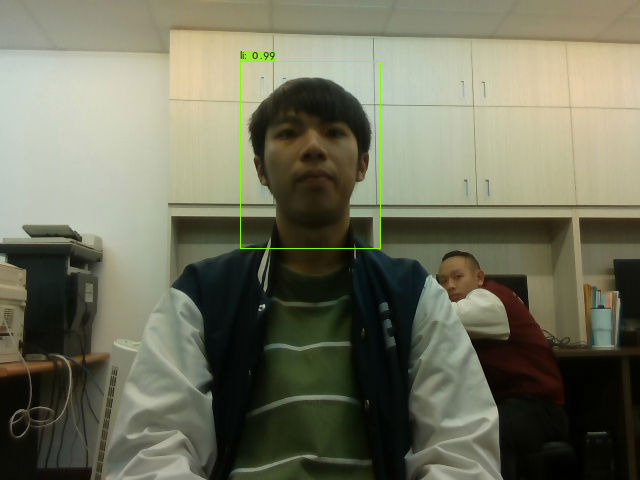

In [43]:
Image.open('/content/darknet/predictions.jpg')

In [ ]:
!cd darknet; ./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg

In [ ]:
!cd darknet ; wget https://pjreddie.com/media/files/yolov3.weights

In [77]:
! cd darknet; ./darknet detector demo /content/cfg_mask/obj.data /content/cfg_mask/yolov4-tiny.cfg /content/face/yolov4-tiny_last.weights zed_camera -dont_show   

/bin/bash: ./darknet: No such file or directory
